# **MLOps. Практическое задание №5 - Георг Фейлер**

## **1. Создание датасетов**

### **Датасет 1**

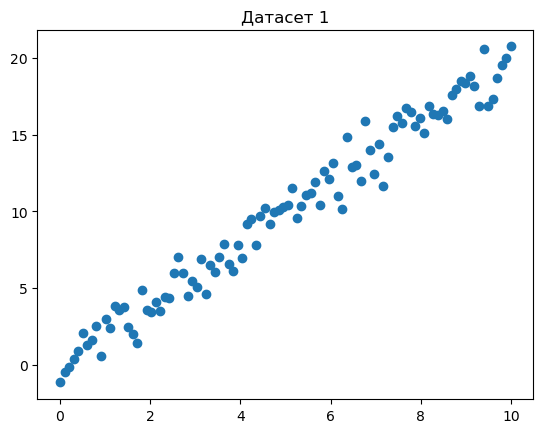

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Датасет 1
xs_1 = np.linspace(0, 10, 100)
ys_1 = 2 * xs_1 + np.random.normal(0, 1, 100)


plt.scatter(xs_1, ys_1)
plt.title("Датасет 1")
plt.show()

### **Датасет 2**

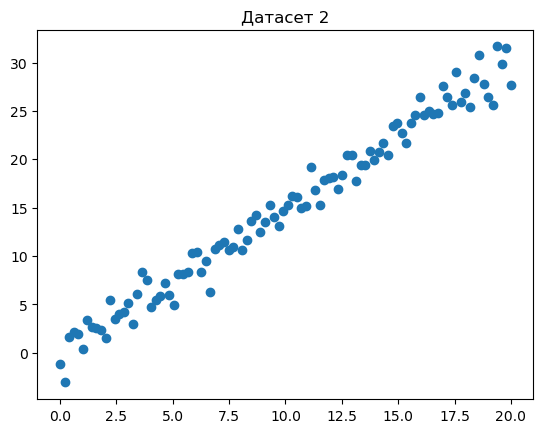

In [87]:
# Датасет 2
xs_2 = np.linspace(0, 20, 100)
ys_2 = 1.5 * xs_2 + np.random.normal(0, 1.5, 100)

plt.scatter(xs_2, ys_2)
plt.title("Датасет 2")
plt.show()

### **Датасет 3**

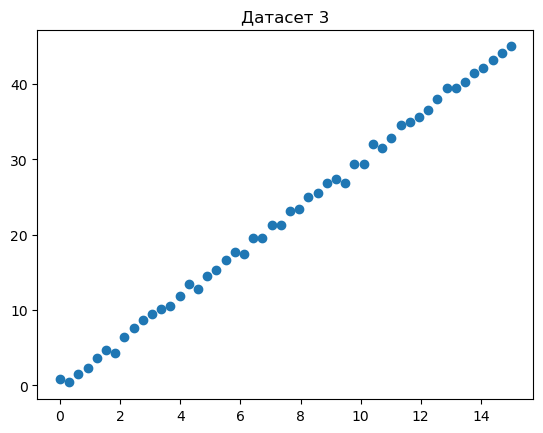

In [88]:
# Датасет 3
xs_3 = np.linspace(0, 15, 50) # Меньше точек
ys_3 = 3 * xs_3 + np.random.normal(0, 0.5, 50)

plt.scatter(xs_3, ys_3)
plt.title("Датасет 3")
plt.show()

## **2. Обучение Модели Линейной Регрессии**

### Обучим для примера модель на одном из датасетов. Пусть это в нашем случае будет датасет №1.

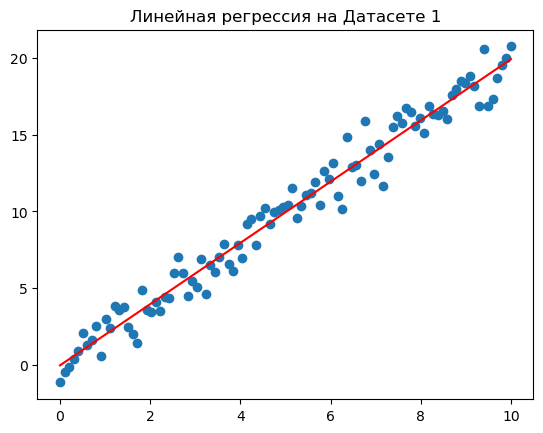

In [89]:
from sklearn.linear_model import LinearRegression

# Обучение модели
model = LinearRegression()
model.fit(xs_1.reshape(-1, 1), ys_1)

# Отображение результатов
plt.scatter(xs_1, ys_1)
plt.plot(xs_1, model.predict(xs_1.reshape(-1, 1)), color='red')
plt.title("Линейная регрессия на Датасете 1")
plt.show()

## **3. Создание Зашумленного Датасета**

#### Теперь создадим датасет с добавленным шумом.

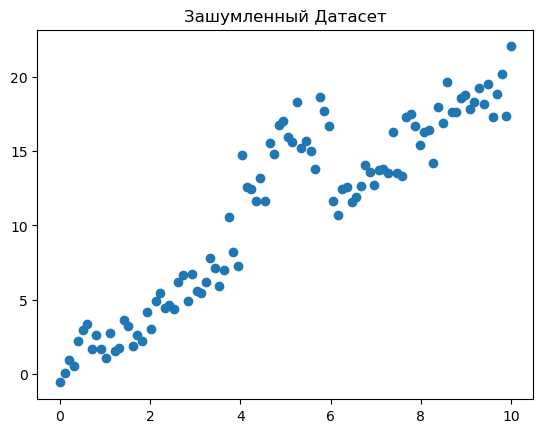

In [90]:
# Зашумленный Датасет
xs_noise = np.linspace(0, 10, 100)
ys_noise = 2 * xs_noise + np.random.normal(0, 1, 100)
ys_noise[40:60] *= 1.5

plt.scatter(xs_noise, ys_noise)
plt.title("Зашумленный Датасет")
plt.show()

## **4. Написание Тестов с Использованием Pytest**

#### Для анализа качества предсказаний, мы будем использовать метрику Mean Squared Error (MSE). Pytest будет использоваться для автоматизированного тестирования. Порог среднеквадратичной ошибки установим на 5.

In [95]:
%%writefile test_datasets.py

import pytest
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np


# Функция тестирования
def test_dataset_1():
    xs = np.linspace(0, 10, 100)
    ys = 2 * xs + np.random.normal(0, 1, 100)
    model = LinearRegression().fit(xs.reshape(-1, 1), ys)
    ys_pred = model.predict(xs.reshape(-1, 1))
    mse = mean_squared_error(ys, ys_pred)
    assert mse < 5

def test_dataset_2():
    xs = np.linspace(0, 20, 100)
    ys = 1.5 * xs + np.random.normal(0, 1.5, 100)
    model = LinearRegression().fit(xs.reshape(-1, 1), ys)
    ys_pred = model.predict(xs.reshape(-1, 1))
    mse = mean_squared_error(ys, ys_pred)
    assert mse < 5

def test_dataset_3():
    xs = np.linspace(0, 15, 50) # Меньше точек
    ys = 3 * xs + np.random.normal(0, 0.5, 50)
    model = LinearRegression().fit(xs.reshape(-1, 1), ys)
    ys_pred = model.predict(xs.reshape(-1, 1))
    mse = mean_squared_error(ys, ys_pred)
    assert mse < 5

def test_dataset_noise():
    xs = np.linspace(0, 10, 100)
    ys = 2 * xs + np.random.normal(0, 1, 100)
    ys[40:60] *= 1.5
    model = LinearRegression().fit(xs.reshape(-1, 1), ys)
    ys_pred = model.predict(xs.reshape(-1, 1))
    mse = mean_squared_error(ys, ys_pred)
    assert mse < 5   
    

Writing test_datasets.py


## **5. Запуск теста**

In [94]:
# Запуск теста
!pytest test_datasets.py

============================= test session starts =============================
platform win32 -- Python 3.10.9, pytest-7.1.2, pluggy-1.0.0
rootdir: C:\Users\User\Desktop\Studium-ML\2. Semester\MLOps\Практическое задание №5
plugins: anyio-3.5.0
collected 4 items

test_datasets.py ...F                                                    [100%]

================================== FAILURES ===================================
_____________________________ test_dataset_noise ______________________________

    def test_dataset_noise():
        xs = np.linspace(0, 10, 100)
        ys = 2 * xs + np.random.normal(0, 1, 100)
        ys[40:60] *= 1.5
        model = LinearRegression().fit(xs.reshape(-1, 1), ys)
        ys_pred = model.predict(xs.reshape(-1, 1))
        mse = mean_squared_error(ys, ys_pred)
>       assert mse < 5
E       assert 5.607312779413643 < 5

test_datasets.py:40: AssertionError
=========================== short test summary info ===========================
FAILED test_data

#### ***Как мы видим, первые три датасета проходят тест без проблем. При нами установленном пороге среднеквадратичной ошибки тест зашумлённого датасета довольно часто проваливается. Таким образом мы смогли показать отрицательное влияние шумов на качество датасетов и, тем самым, на качество предсказаний.***